In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
697,ham,meet you in corporation st outside gap Û_ you...,NaN,NaN,NaN
5480,ham,Have you seen who's back at Holby?!,NaN,NaN,NaN
966,ham,I am not sure about night menu. . . I know onl...,NaN,NaN,NaN
1435,ham,Dad went out oredi...,NaN,NaN,NaN
3529,ham,Tyler (getting an 8th) has to leave not long a...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4783,ham,Indeed and by the way it was either or - not b...
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...
4645,spam,We tried to contact you re your reply to our o...
3626,ham,Still chance there. If you search hard you wil...
1000,ham,No..but heard abt tat..


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)
#renaming the cols

,target,text
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...
2329,ham,Am surfing online store. For offers do you wan...
2200,ham,Haha... can... But i'm having dinner with my c...
1963,ham,Yes :)it completely in out of form:)clark also...
370,ham,Hello my boytoy ... Geeee I miss you already a...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
value_counts = df['target'].value_counts()


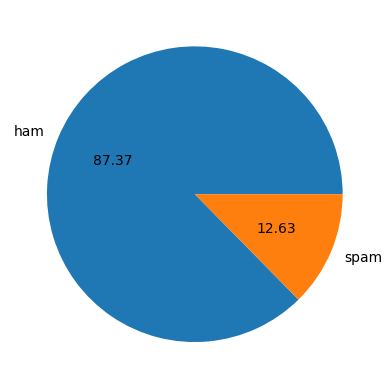

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# num of words
df['num_sentences']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [30]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

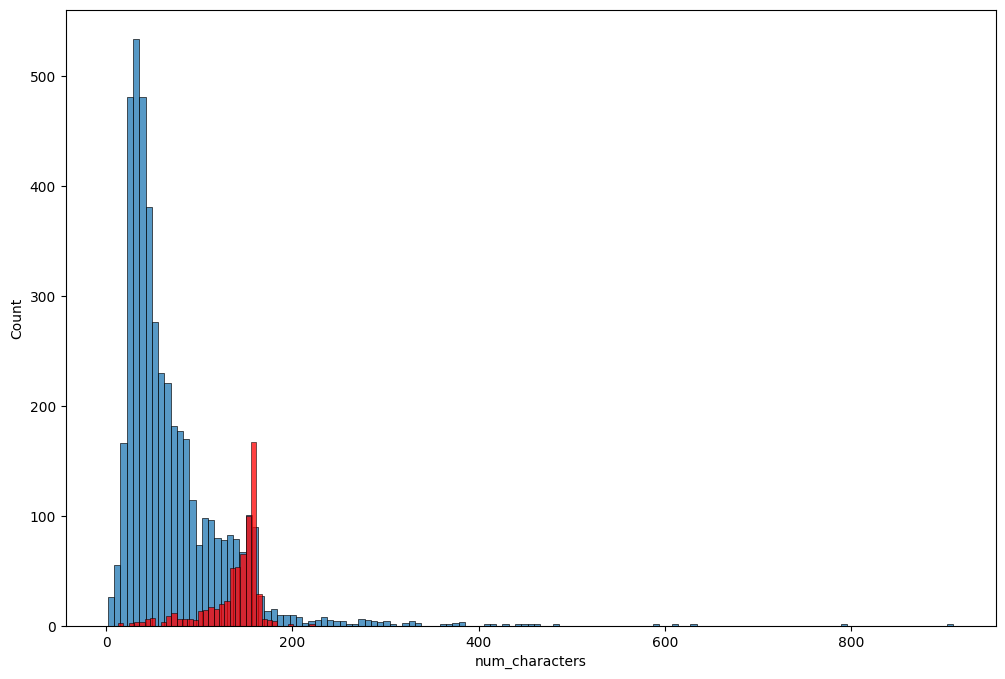

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_characters'])
sns.histplot(df[df['target'] == 1] ['num_characters'],color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

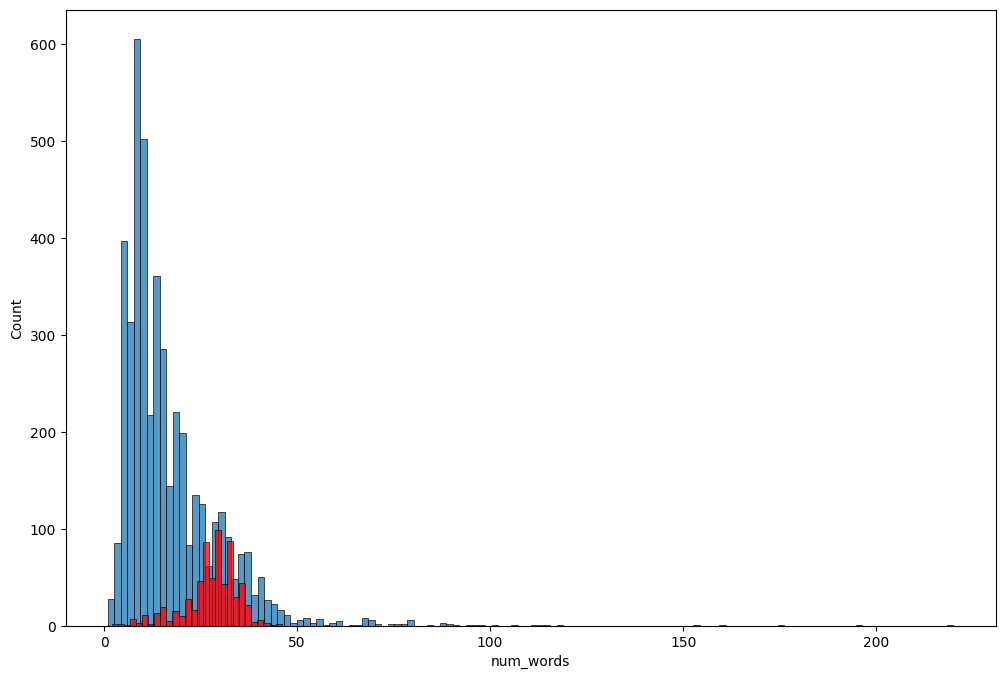

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'],color= 'red')

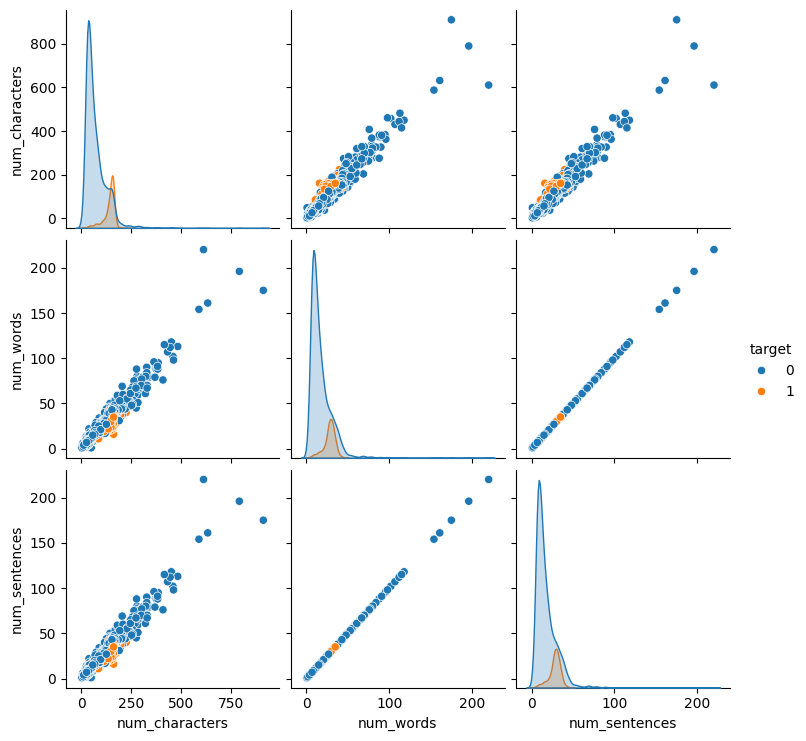

In [35]:
sns.pairplot(df,hue='target')

In [36]:
numeric_df = df.select_dtypes(include=[float, int])


In [37]:
numeric_df = numeric_df.fillna(numeric_df.mean())


In [38]:
corr_matrix = numeric_df.corr()


<Axes: >

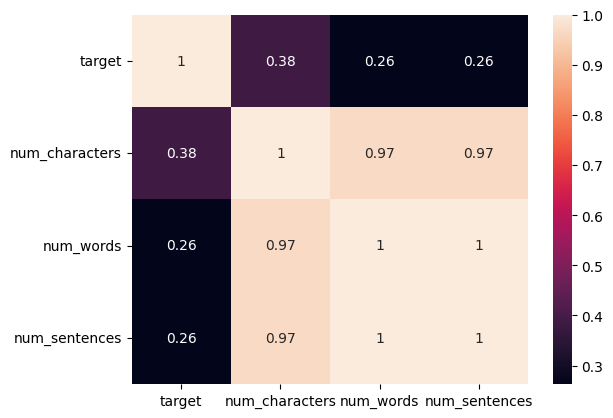

In [39]:
sns.heatmap(corr_matrix, annot=True)


## 3. DATA PROCESSING


In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [42]:
from nltk.corpus import stopwords
import string

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

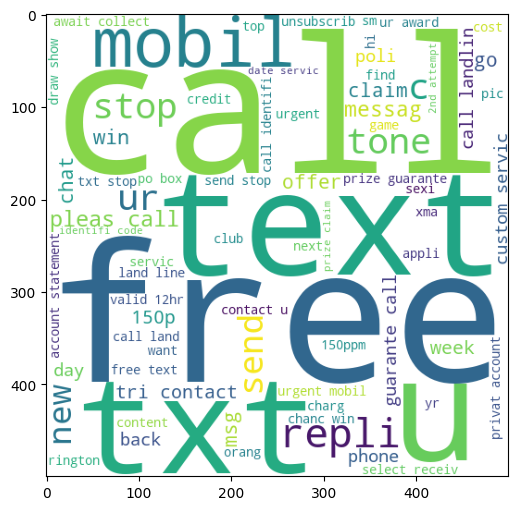

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

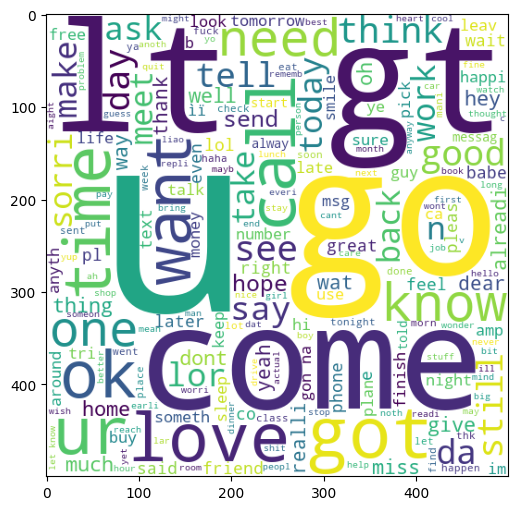

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter
 # will return dict where key=word in corpus value = n0. of occurence

In [57]:
# Get the 30 most common words and their counts
most_common_words = Counter(spam_corpus).most_common(30)

In [58]:
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
# Convert to DataFrame


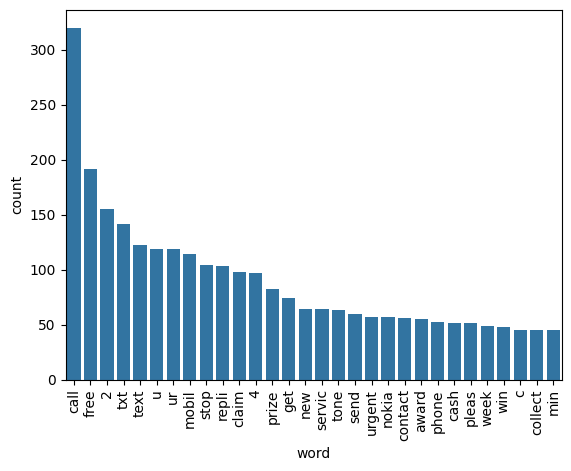

In [59]:
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

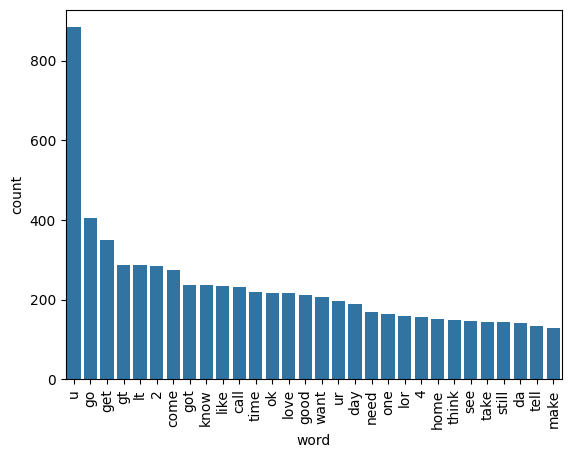

In [62]:
from collections import Counter
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using sns.barplot
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
#Text vextorization
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


## 4. MODEL BUILDING


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=3500)

In [65]:
 ## create vectors of transformed text feature and then stored it in x variable
x = tf_idf.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

In [66]:
x.shape

(5169, 3500)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [73]:
# now try to train MultinomialNB(), it will work
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test, y_pred))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [74]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,x_train,y_train,x_test,y_test)
# support vector classifier

(0.9758220502901354, 0.9747899159663865)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executabl

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9595959595959596
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991


C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9814814814814815
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286
For  xgb
Accuracy -  0.965183752417795
Precision -  0.925


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970019,1.000000
5,RF,0.971954,0.990991
6,AdaBoost,0.967118,0.981481
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LR,0.954545,0.959596
9,GBDT,0.947776,0.928571
10,xgb,0.965184,0.925000
7,BgC,0.957447,0.861538


In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [84]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970019
2,RF,Accuracy,0.971954
3,AdaBoost,Accuracy,0.967118
4,ETC,Accuracy,0.979691
5,SVC,Accuracy,0.975822
6,LR,Accuracy,0.954545
7,GBDT,Accuracy,0.947776
8,xgb,Accuracy,0.965184
9,BgC,Accuracy,0.957447


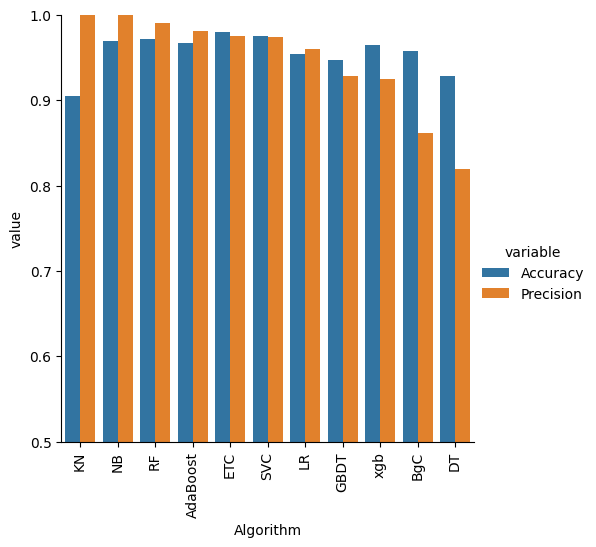

In [85]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [90]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [91]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,RF,0.971954,0.990991,0.971954,0.990991,0.971954,0.990991,0.971954,0.990991
3,AdaBoost,0.967118,0.981481,0.967118,0.981481,0.967118,0.981481,0.967118,0.981481
4,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
5,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
6,LR,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596
7,GBDT,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571
8,xgb,0.965184,0.925000,0.965184,0.925000,0.965184,0.925000,0.965184,0.925000
9,BgC,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538


In [94]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [96]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [98]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [101]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


### Step 1: Train and Save the Model

In [102]:
import joblib

# Assuming `voting` is your trained model
joblib.dump(voting, 'spam_classifier.pkl')

['spam_classifier.pkl']

### Step 2: Create the Tkinter Interface

In [103]:
import tkinter as tk
from tkinter import messagebox
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model
voting = joblib.load('spam_classifier.pkl')

# Assuming you have used TfidfVectorizer for transforming the text data
tfidf_vectorizer = TfidfVectorizer(max_features=3500)
# Fit and transform your training data (example)
# tfidf_vectorizer.fit_transform(x_train) # fit with training data

def predict_spam():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Please enter some text!")
        return
    
    # Transform the input text using the same TfidfVectorizer
    transformed_text = tfidf_vectorizer.transform([text])
    prediction = voting.predict(transformed_text)
    
    result = "Spam" if prediction[0] == 1 else "Not Spam"
    messagebox.showinfo("Prediction Result", f"The message is: {result}")

# Create the main application window
app = tk.Tk()
app.title("SMS Spam Classifier")

# Create and place the components in the window
label = tk.Label(app, text="Enter SMS Text:")
label.pack(pady=10)

entry = tk.Entry(app, width=50)
entry.pack(pady=10)

predict_button = tk.Button(app, text="Predict", command=predict_spam)
predict_button.pack(pady=20)

# Run the application
app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Temp\ipykernel_4148\1660302520.py", line 21, in predict_spam
    transformed_text = tfidf_vectorizer.transform([text])
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py", line 2115, in transform
    check_is_fitted(self, msg="The TF-IDF vectorizer is not fitted")
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1632, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: The TF-IDF vectorizer is not fitted


In [5]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the data
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3500)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Define the classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create a voting classifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(x_train_tfidf, y_train)


# Save the trained model and vectorizer
joblib.dump(voting, 'spam_classifier.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the trained model and vectorizer
voting = joblib.load('spam_classifier.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_spam():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Please enter some text!")
        return
    
    # Transform the input text using the fitted TF-IDF vectorizer
    transformed_text = tfidf_vectorizer.transform([text])
    prediction = voting.predict(transformed_text)
    
    result = "Spam" if prediction[0] == 1 else "Not Spam"
    messagebox.showinfo("Prediction Result", f"The message is: {result}")

# Create the main application window
app = tk.Tk()
app.title("SMS Spam Classifier")

# Create and place the components in the window
label = tk.Label(app, text="Enter SMS Text:")
label.pack(pady=10)

entry = tk.Entry(app, width=50)
entry.pack(pady=10)

predict_button = tk.Button(app, text="Predict", command=predict_spam)
predict_button.pack(pady=20)

# Run the application
app.mainloop()
